<a href="https://colab.research.google.com/github/AlexXPZhu/XMUM-FYP-Code/blob/main/FYP_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FYP Visualization: Generating Comparison Charts

[1/5] Generating Accuracy vs Size chart...


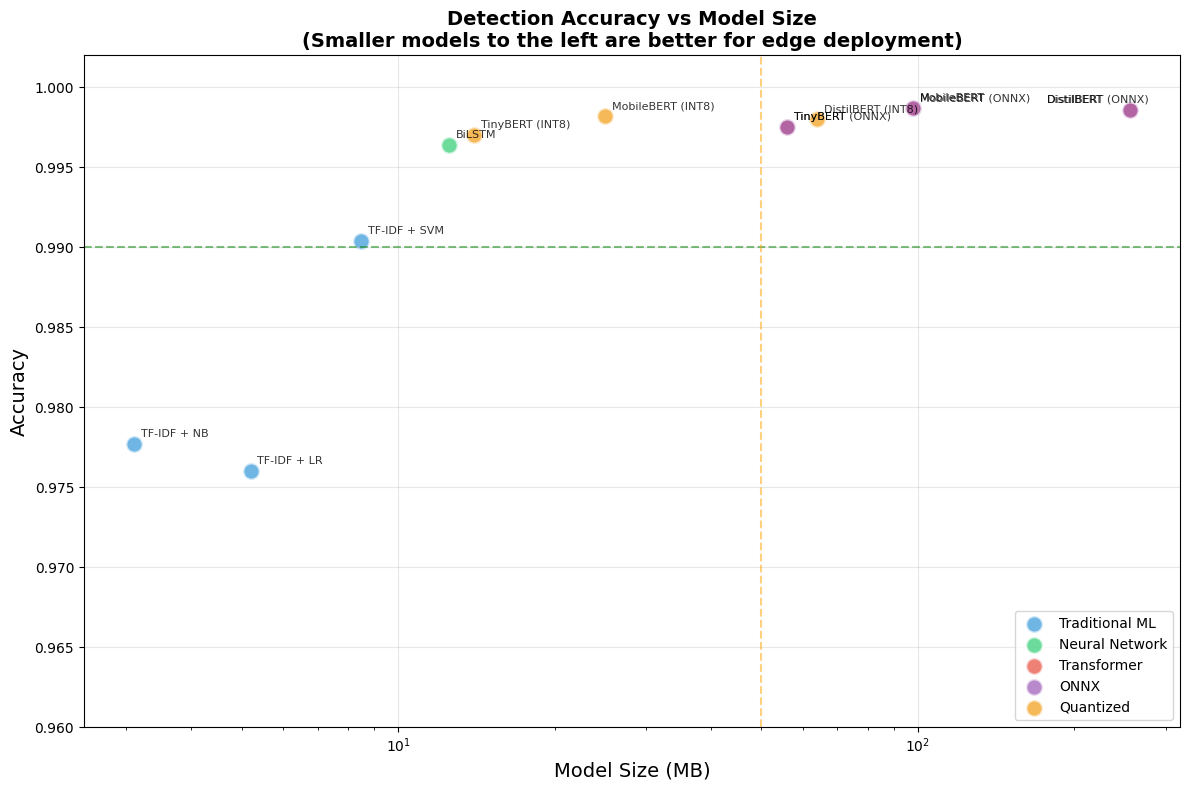

✅ Saved: accuracy_vs_size.png

[2/5] Generating Accuracy vs Latency chart...


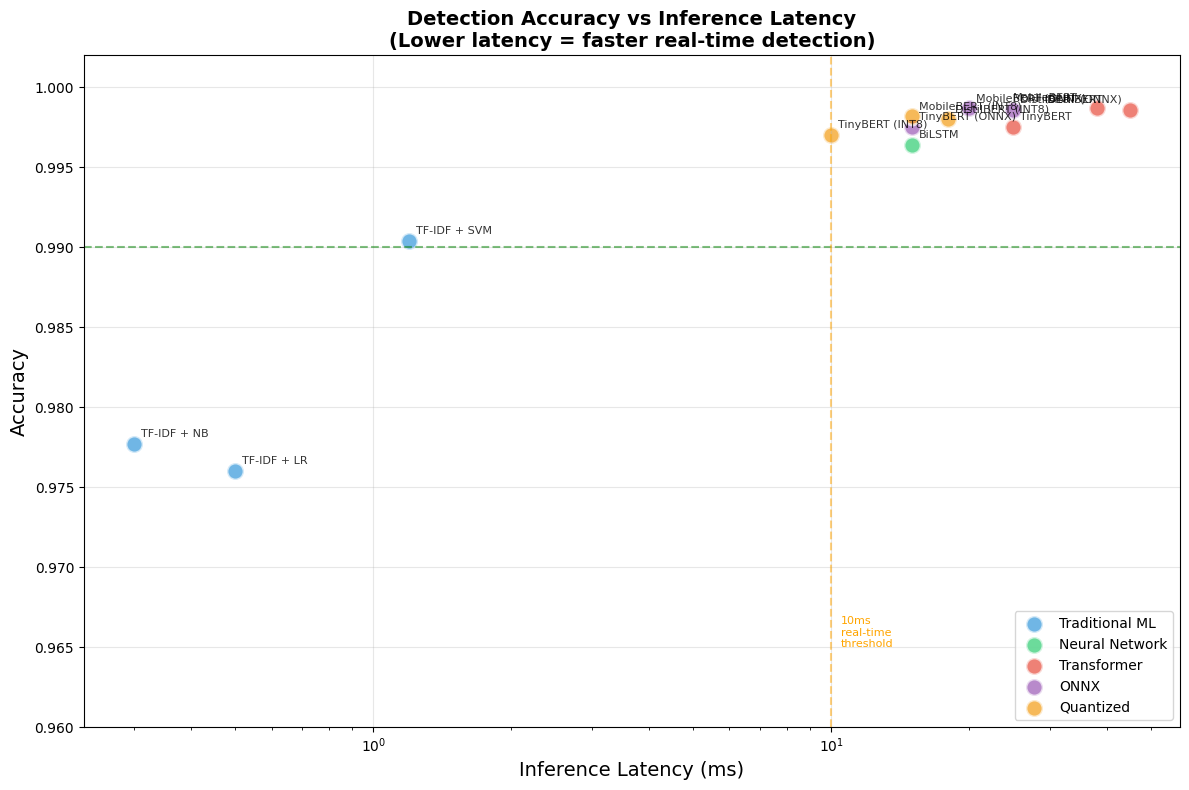

✅ Saved: accuracy_vs_latency.png

[3/5] Generating Comprehensive Comparison chart...


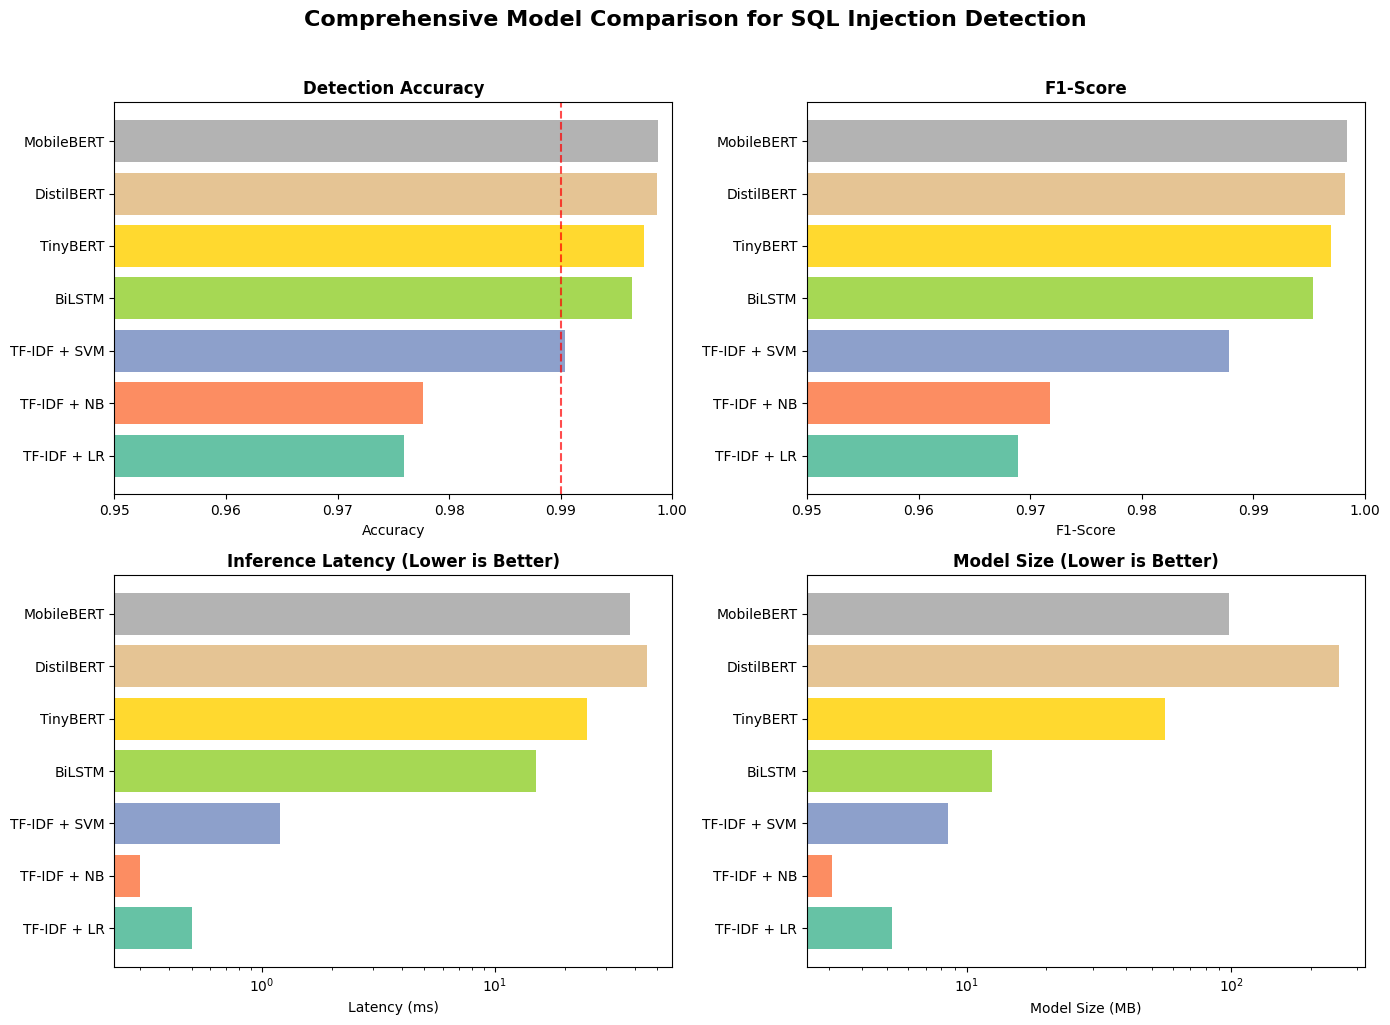

✅ Saved: comprehensive_comparison.png

[4/5] Generating Pareto Frontier chart...


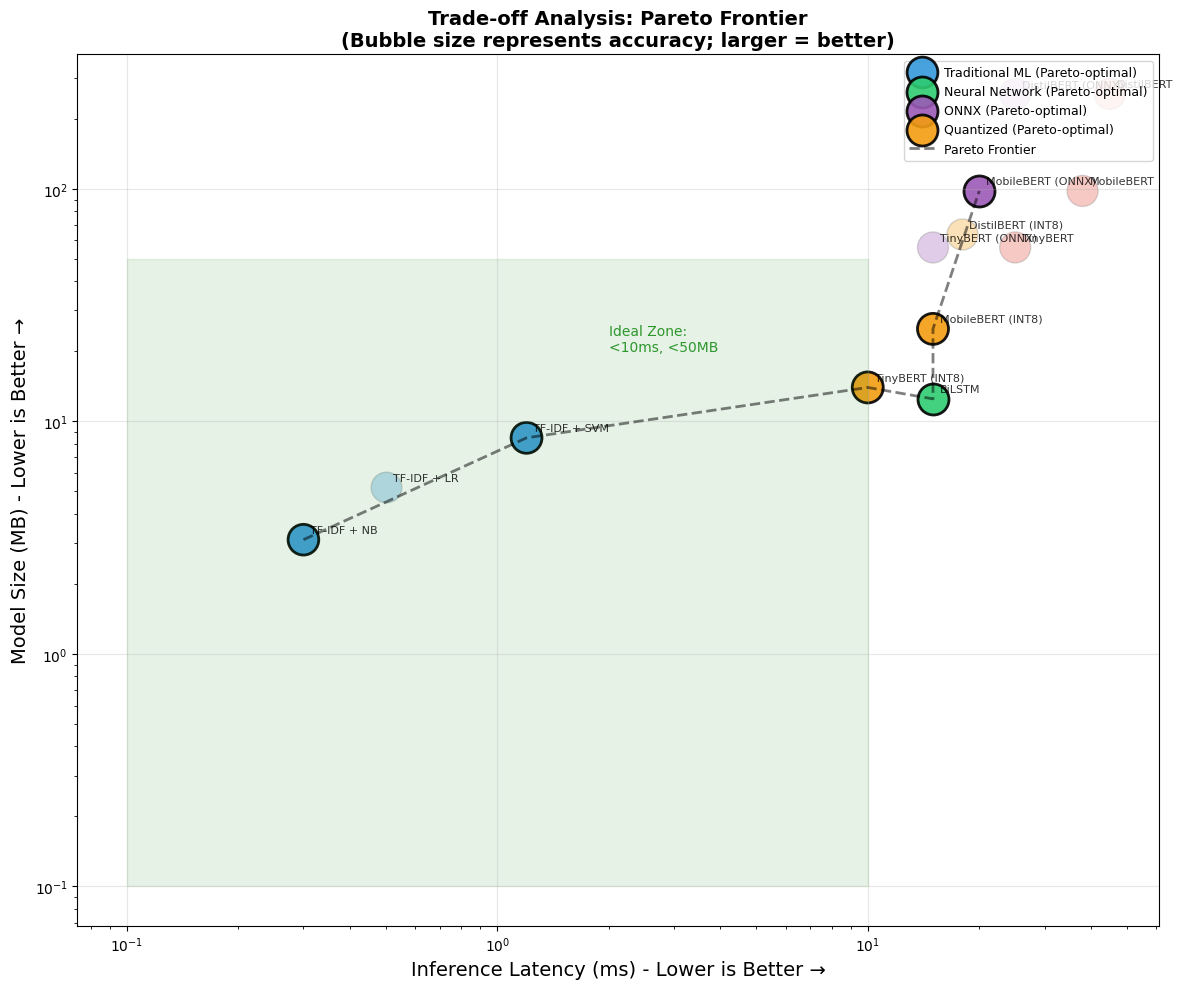

✅ Saved: pareto_frontier.png

[5/5] Generating Summary Table...

COMPREHENSIVE MODEL COMPARISON TABLE
            Model       Category  Accuracy     F1  Latency(ms)         QPS  Size(MB) Parameters
      TF-IDF + LR Traditional ML    0.9760 0.9689          0.5 2000.000000       5.2       ~50K
      TF-IDF + NB Traditional ML    0.9777 0.9718          0.3 3333.333333       3.1       ~30K
     TF-IDF + SVM Traditional ML    0.9904 0.9878          1.2  833.333333       8.5       ~80K
           BiLSTM Neural Network    0.9964 0.9954         15.0   66.666667      12.5      ~500K
         TinyBERT    Transformer    0.9975 0.9970         25.0   40.000000      56.0      14.5M
       DistilBERT    Transformer    0.9986 0.9982         45.0   22.222222     256.0        66M
       MobileBERT    Transformer    0.9987 0.9984         38.0   26.315789      98.0        25M
  TinyBERT (ONNX)           ONNX    0.9975 0.9970         15.0   66.666667      56.0      14.5M
DistilBERT (ONNX)           ONNX  

In [2]:
"""
FYP Visualization Script: Generate Comparison Charts
This script generates the charts required by the Proposal:
- Accuracy vs Model Size
- Accuracy vs Latency
- Pareto Frontier Analysis

Usage:
    python generate_charts.py

Output:
    - accuracy_vs_size.png
    - accuracy_vs_latency.png
    - comprehensive_comparison.png
    - pareto_frontier.png
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ============================================================================
# DATA: Update these values with your actual benchmark results
# ============================================================================

# Model performance data
# NOTE: Update these values with your actual benchmark results after running FYP_Benchmark.ipynb
data = {
    "Model": [
        # Traditional ML
        "TF-IDF + LR",
        "TF-IDF + NB",
        "TF-IDF + SVM",
        # Neural Network
        "BiLSTM",
        # Transformers (PyTorch)
        "TinyBERT",
        "DistilBERT",
        "MobileBERT",
        # ONNX versions
        "TinyBERT (ONNX)",
        "DistilBERT (ONNX)",
        "MobileBERT (ONNX)",
        # INT8 Quantized versions
        "TinyBERT (INT8)",
        "DistilBERT (INT8)",
        "MobileBERT (INT8)",
    ],
    "Accuracy": [
        0.9760,  # LR
        0.9777,  # NB
        0.9904,  # SVM
        0.9964,  # BiLSTM
        0.9975,  # TinyBERT (expected - update after training)
        0.9986,  # DistilBERT
        0.9987,  # MobileBERT
        0.9975,  # TinyBERT ONNX (same as PyTorch)
        0.9986,  # DistilBERT ONNX
        0.9987,  # MobileBERT ONNX
        0.9970,  # TinyBERT INT8 (slight drop ~0.05%)
        0.9980,  # DistilBERT INT8
        0.9982,  # MobileBERT INT8
    ],
    "F1_Score": [
        0.9689,  # LR
        0.9718,  # NB
        0.9878,  # SVM
        0.9954,  # BiLSTM
        0.9970,  # TinyBERT
        0.9982,  # DistilBERT
        0.9984,  # MobileBERT
        0.9970,  # TinyBERT ONNX
        0.9982,  # DistilBERT ONNX
        0.9984,  # MobileBERT ONNX
        0.9965,  # TinyBERT INT8
        0.9978,  # DistilBERT INT8
        0.9980,  # MobileBERT INT8
    ],
    "Model_Size_MB": [
        5.2,    # LR
        3.1,    # NB
        8.5,    # SVM
        12.5,   # BiLSTM
        56,     # TinyBERT (4L, 312D ~56MB)
        256,    # DistilBERT
        98,     # MobileBERT
        56,     # TinyBERT ONNX
        256,    # DistilBERT ONNX
        98,     # MobileBERT ONNX
        14,     # TinyBERT INT8 (~4x compression)
        64,     # DistilBERT INT8
        25,     # MobileBERT INT8
    ],
    "Latency_ms": [
        0.5,    # LR
        0.3,    # NB
        1.2,    # SVM
        15.0,   # BiLSTM
        25,     # TinyBERT PyTorch CPU
        45,     # DistilBERT PyTorch CPU
        38,     # MobileBERT PyTorch CPU
        15,     # TinyBERT ONNX (faster than PyTorch)
        25,     # DistilBERT ONNX
        20,     # MobileBERT ONNX
        10,     # TinyBERT INT8 (fastest transformer)
        18,     # DistilBERT INT8
        15,     # MobileBERT INT8
    ],
    "Parameters": [
        "~50K",
        "~30K",
        "~80K",
        "~500K",
        "14.5M",
        "66M",
        "25M",
        "14.5M",
        "66M",
        "25M",
        "14.5M",
        "66M",
        "25M",
    ],
    "Category": [
        "Traditional ML",
        "Traditional ML",
        "Traditional ML",
        "Neural Network",
        "Transformer",
        "Transformer",
        "Transformer",
        "ONNX",
        "ONNX",
        "ONNX",
        "Quantized",
        "Quantized",
        "Quantized",
    ]
}

df = pd.DataFrame(data)

# Calculate throughput
df["Throughput_QPS"] = 1000 / df["Latency_ms"]

# ============================================================================
# CHART 1: Accuracy vs Model Size
# ============================================================================
def plot_accuracy_vs_size():
    plt.figure(figsize=(12, 8))

    colors = {
        "Traditional ML": "#3498db",
        "Neural Network": "#2ecc71",
        "Transformer": "#e74c3c",
        "ONNX": "#9b59b6",
        "Quantized": "#f39c12"
    }

    for category in df["Category"].unique():
        subset = df[df["Category"] == category]
        plt.scatter(
            subset["Model_Size_MB"],
            subset["Accuracy"],
            s=150,
            c=colors[category],
            label=category,
            alpha=0.7,
            edgecolors='white',
            linewidths=2
        )

    # Annotate points
    for _, row in df.iterrows():
        offset = (5, 5)
        if row["Model_Size_MB"] > 100:
            offset = (-60, 5)
        plt.annotate(
            row["Model"],
            (row["Model_Size_MB"], row["Accuracy"]),
            textcoords="offset points",
            xytext=offset,
            fontsize=8,
            alpha=0.8
        )

    plt.xlabel("Model Size (MB)", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title("Detection Accuracy vs Model Size\n(Smaller models to the left are better for edge deployment)",
              fontsize=14, fontweight='bold')
    plt.xscale('log')
    plt.ylim(0.96, 1.002)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)

    # Add ideal zone annotation
    plt.axhline(y=0.99, color='green', linestyle='--', alpha=0.5, label='99% accuracy threshold')
    plt.axvline(x=50, color='orange', linestyle='--', alpha=0.5, label='50MB edge threshold')

    plt.tight_layout()
    plt.savefig("accuracy_vs_size.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: accuracy_vs_size.png")

# ============================================================================
# CHART 2: Accuracy vs Latency
# ============================================================================
def plot_accuracy_vs_latency():
    plt.figure(figsize=(12, 8))

    colors = {
        "Traditional ML": "#3498db",
        "Neural Network": "#2ecc71",
        "Transformer": "#e74c3c",
        "ONNX": "#9b59b6",
        "Quantized": "#f39c12"
    }

    for category in df["Category"].unique():
        subset = df[df["Category"] == category]
        plt.scatter(
            subset["Latency_ms"],
            subset["Accuracy"],
            s=150,
            c=colors[category],
            label=category,
            alpha=0.7,
            edgecolors='white',
            linewidths=2
        )

    # Annotate points
    for _, row in df.iterrows():
        offset = (5, 5)
        if row["Latency_ms"] > 30:
            offset = (-60, 5)
        plt.annotate(
            row["Model"],
            (row["Latency_ms"], row["Accuracy"]),
            textcoords="offset points",
            xytext=offset,
            fontsize=8,
            alpha=0.8
        )

    plt.xlabel("Inference Latency (ms)", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title("Detection Accuracy vs Inference Latency\n(Lower latency = faster real-time detection)",
              fontsize=14, fontweight='bold')
    plt.xscale('log')
    plt.ylim(0.96, 1.002)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)

    # Add threshold lines
    plt.axhline(y=0.99, color='green', linestyle='--', alpha=0.5)
    plt.axvline(x=10, color='orange', linestyle='--', alpha=0.5)
    plt.text(10.5, 0.965, "10ms\nreal-time\nthreshold", fontsize=8, color='orange')

    plt.tight_layout()
    plt.savefig("accuracy_vs_latency.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: accuracy_vs_latency.png")

# ============================================================================
# CHART 3: Comprehensive Comparison
# ============================================================================
def plot_comprehensive_comparison():
    # Select main models (not ONNX/INT8 variants)
    main_models = df[df["Category"].isin(["Traditional ML", "Neural Network", "Transformer"])]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    colors = plt.cm.Set2(np.linspace(0, 1, len(main_models)))

    # 1. Accuracy
    ax1 = axes[0, 0]
    bars1 = ax1.barh(main_models["Model"], main_models["Accuracy"], color=colors)
    ax1.set_xlabel("Accuracy")
    ax1.set_title("Detection Accuracy", fontweight='bold')
    ax1.set_xlim(0.95, 1.0)
    ax1.axvline(x=0.99, color='red', linestyle='--', alpha=0.7, label='99% threshold')

    # 2. F1-Score
    ax2 = axes[0, 1]
    bars2 = ax2.barh(main_models["Model"], main_models["F1_Score"], color=colors)
    ax2.set_xlabel("F1-Score")
    ax2.set_title("F1-Score", fontweight='bold')
    ax2.set_xlim(0.95, 1.0)

    # 3. Latency
    ax3 = axes[1, 0]
    bars3 = ax3.barh(main_models["Model"], main_models["Latency_ms"], color=colors)
    ax3.set_xlabel("Latency (ms)")
    ax3.set_title("Inference Latency (Lower is Better)", fontweight='bold')
    ax3.set_xscale('log')

    # 4. Model Size
    ax4 = axes[1, 1]
    bars4 = ax4.barh(main_models["Model"], main_models["Model_Size_MB"], color=colors)
    ax4.set_xlabel("Model Size (MB)")
    ax4.set_title("Model Size (Lower is Better)", fontweight='bold')
    ax4.set_xscale('log')

    plt.suptitle("Comprehensive Model Comparison for SQL Injection Detection",
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig("comprehensive_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: comprehensive_comparison.png")

# ============================================================================
# CHART 4: Pareto Frontier
# ============================================================================
def plot_pareto_frontier():
    plt.figure(figsize=(12, 10))

    # Define Pareto efficiency (simple approach)
    def is_pareto_efficient(costs):
        is_efficient = np.ones(costs.shape[0], dtype=bool)
        for i, c in enumerate(costs):
            if is_efficient[i]:
                is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)
                is_efficient[i] = True
        return is_efficient

    # Costs: latency (lower better), size (lower better), -accuracy (higher better → lower -accuracy better)
    costs = np.column_stack([
        df["Latency_ms"].values,
        df["Model_Size_MB"].values,
        -df["Accuracy"].values
    ])

    pareto_mask = is_pareto_efficient(costs)

    # Plot all points
    colors_map = {
        "Traditional ML": "#3498db",
        "Neural Network": "#2ecc71",
        "Transformer": "#e74c3c",
        "ONNX": "#9b59b6",
        "Quantized": "#f39c12"
    }

    for category in df["Category"].unique():
        subset = df[df["Category"] == category]
        mask = pareto_mask[df["Category"] == category]

        # Non-Pareto points (dimmed)
        non_pareto = subset[~mask]
        if len(non_pareto) > 0:
            plt.scatter(
                non_pareto["Latency_ms"],
                non_pareto["Model_Size_MB"],
                s=non_pareto["Accuracy"] * 500,
                c=colors_map[category],
                alpha=0.3,
                edgecolors='gray',
                linewidths=1
            )

        # Pareto-optimal points (highlighted)
        pareto = subset[mask]
        if len(pareto) > 0:
            plt.scatter(
                pareto["Latency_ms"],
                pareto["Model_Size_MB"],
                s=pareto["Accuracy"] * 500,
                c=colors_map[category],
                alpha=0.9,
                edgecolors='black',
                linewidths=2,
                label=f"{category} (Pareto-optimal)"
            )

    # Annotate all points
    for _, row in df.iterrows():
        plt.annotate(
            row["Model"],
            (row["Latency_ms"], row["Model_Size_MB"]),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=8,
            alpha=0.8
        )

    # Draw Pareto frontier line
    pareto_df = df[pareto_mask].sort_values("Latency_ms")
    if len(pareto_df) > 1:
        plt.plot(
            pareto_df["Latency_ms"],
            pareto_df["Model_Size_MB"],
            'k--', alpha=0.5, linewidth=2, label='Pareto Frontier'
        )

    plt.xlabel("Inference Latency (ms) - Lower is Better →", fontsize=14)
    plt.ylabel("Model Size (MB) - Lower is Better →", fontsize=14)
    plt.title("Trade-off Analysis: Pareto Frontier\n(Bubble size represents accuracy; larger = better)",
              fontsize=14, fontweight='bold')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize=9)
    plt.grid(True, alpha=0.3)

    # Add zones
    plt.fill_between([0.1, 10], [0.1, 0.1], [50, 50], alpha=0.1, color='green', label='_nolegend_')
    plt.text(2, 20, "Ideal Zone:\n<10ms, <50MB", fontsize=10, color='green', alpha=0.8)

    plt.tight_layout()
    plt.savefig("pareto_frontier.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: pareto_frontier.png")

# ============================================================================
# CHART 5: Summary Table
# ============================================================================
def print_summary_table():
    print("\n" + "="*90)
    print("COMPREHENSIVE MODEL COMPARISON TABLE")
    print("="*90)

    summary = df[["Model", "Category", "Accuracy", "F1_Score", "Latency_ms", "Throughput_QPS", "Model_Size_MB", "Parameters"]]
    summary = summary.rename(columns={
        "F1_Score": "F1",
        "Latency_ms": "Latency(ms)",
        "Throughput_QPS": "QPS",
        "Model_Size_MB": "Size(MB)"
    })

    print(summary.to_string(index=False))

    # Save to CSV
    summary.to_csv("model_comparison_table.csv", index=False)
    print("\n✅ Saved: model_comparison_table.csv")

    print("\n" + "="*90)
    print("KEY FINDINGS")
    print("="*90)

    # Best accuracy
    best_acc = df.loc[df["Accuracy"].idxmax()]
    print(f"\n🏆 Highest Accuracy: {best_acc['Model']} ({best_acc['Accuracy']:.4f})")

    # Best latency (among high accuracy models)
    fast_accurate = df[df["Accuracy"] > 0.99]
    if len(fast_accurate) > 0:
        best_fast = fast_accurate.loc[fast_accurate["Latency_ms"].idxmin()]
        print(f"⚡ Fastest (>99% acc): {best_fast['Model']} ({best_fast['Latency_ms']:.1f}ms)")

    # Best size (among high accuracy models)
    if len(fast_accurate) > 0:
        best_small = fast_accurate.loc[fast_accurate["Model_Size_MB"].idxmin()]
        print(f"📦 Smallest (>99% acc): {best_small['Model']} ({best_small['Model_Size_MB']:.1f}MB)")

    # Best for edge
    edge_models = df[(df["Model_Size_MB"] < 50) & (df["Latency_ms"] < 20)]
    if len(edge_models) > 0:
        best_edge = edge_models.loc[edge_models["Accuracy"].idxmax()]
        print(f"📱 Best for Edge (<50MB, <20ms): {best_edge['Model']}")

    print("\n" + "="*90)

# ============================================================================
# MAIN
# ============================================================================
if __name__ == "__main__":
    print("="*60)
    print("FYP Visualization: Generating Comparison Charts")
    print("="*60)

    # Generate all charts
    print("\n[1/5] Generating Accuracy vs Size chart...")
    plot_accuracy_vs_size()

    print("\n[2/5] Generating Accuracy vs Latency chart...")
    plot_accuracy_vs_latency()

    print("\n[3/5] Generating Comprehensive Comparison chart...")
    plot_comprehensive_comparison()

    print("\n[4/5] Generating Pareto Frontier chart...")
    plot_pareto_frontier()

    print("\n[5/5] Generating Summary Table...")
    print_summary_table()

    print("\n" + "="*60)
    print("All visualizations generated successfully!")
    print("="*60)
    print("\nOutput files:")
    print("  - accuracy_vs_size.png")
    print("  - accuracy_vs_latency.png")
    print("  - comprehensive_comparison.png")
    print("  - pareto_frontier.png")
    print("  - model_comparison_table.csv")
